Image batch shape:torch.Size([64, 1, 28, 28])
Label batch shape:torch.Size([64])
MyNeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1/5, Loss: 0.5158646702130975, Train_acc = 86.01% , Test_acc = 84.38%
Epoch 2/5, Loss: 0.3784577158341276, Train_acc = 87.69% , Test_acc = 85.50%
Epoch 3/5, Loss: 0.34203787288590787, Train_acc = 88.11% , Test_acc = 86.29%
Epoch 4/5, Loss: 0.3157960703965825, Train_acc = 88.16% , Test_acc = 85.55%
Epoch 5/5, Loss: 0.2979106144117775, Train_acc = 89.94% , Test_acc = 87.51%


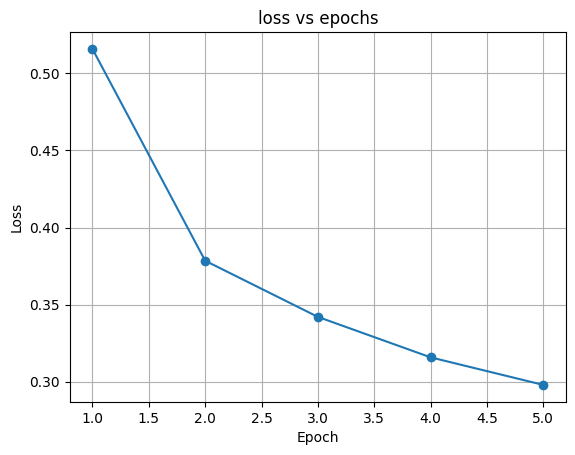

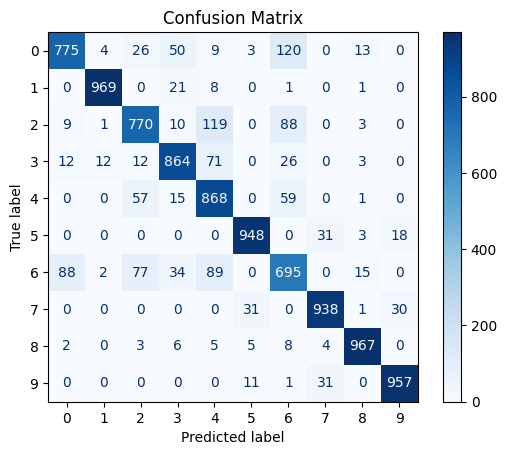

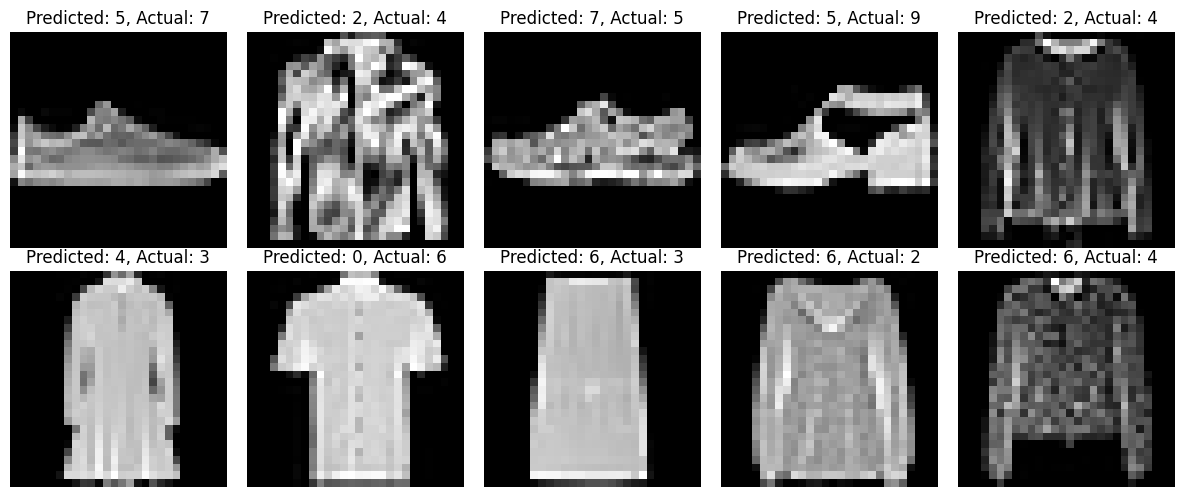

In [5]:
#TASK 1
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
train_batch = datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)
test_batch = datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_batch,batch_size=64,shuffle=True)
test_loader = DataLoader(test_batch,batch_size=64,shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Image batch shape:{images.shape}")
print(f"Label batch shape:{labels.shape}")

#TASK 2
class MyNeuralNet(nn.Module):
  def __init__(self):
    super(MyNeuralNet,self).__init__()
    self.fc1 = nn.Linear(784,128) #input to first hidden layer.
    self.fc2 = nn.Linear(128,64) #first to second hidden layer.
    self.fc3 = nn.Linear(64,10) #second to output layer.
  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
model = MyNeuralNet()
print(model)
criterion = nn.CrossEntropyLoss()

#TASK 3
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

def accuracy(loader): #accuracy func
  correct=0
  total=0
  with torch.no_grad():
    for images,labels in loader:
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  return 100 * correct/total
#Training loop
loss_values = []
epochs=5
for epoch in range(epochs):
  moving_loss=0.0
  for images,labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    moving_loss+=loss.item()
  avg_loss = moving_loss/len(train_loader)
  loss_values.append(avg_loss)
  train_acc = accuracy(train_loader)
  test_acc = accuracy(test_loader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}, Train_acc = {train_acc:.2f}% , Test_acc = {test_acc:.2f}%")

plt.plot(range(1,epochs+1),loss_values, marker='o')
plt.title("loss vs epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = []
true_labels = []
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predictions.extend(predicted.numpy())
    true_labels.extend(labels.numpy())
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#10 misclassified images
wrong_images = []
wrong_preds = []
actual_lables = []
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(predicted)):
      if predicted[i] != labels[i]:
        wrong_images.append(images[i])
        wrong_preds.append(predicted[i].item())
        actual_lables.append(labels[i].item())
      if len(wrong_images) == 10:
        break
    if len(wrong_images)==10:
      break

#plotting the 10 misclassifed images
plt.figure(figsize =(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(wrong_images[i].squeeze(),cmap='gray')
  plt.title(f"Predicted: {wrong_preds[i]}, Actual: {actual_lables[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

Image batch shape:torch.Size([64, 1, 28, 28])
Label batch shape:torch.Size([64])
MyNeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1/5, Loss: 0.638476516201552, Train_acc = 82.55% , Test_acc = 81.67%
Epoch 2/5, Loss: 0.4660808732832419, Train_acc = 84.22% , Test_acc = 82.97%
Epoch 3/5, Loss: 0.4310880163585199, Train_acc = 85.51% , Test_acc = 83.81%
Epoch 4/5, Loss: 0.40794601073778514, Train_acc = 86.41% , Test_acc = 84.50%
Epoch 5/5, Loss: 0.3933350410002635, Train_acc = 86.14% , Test_acc = 84.57%


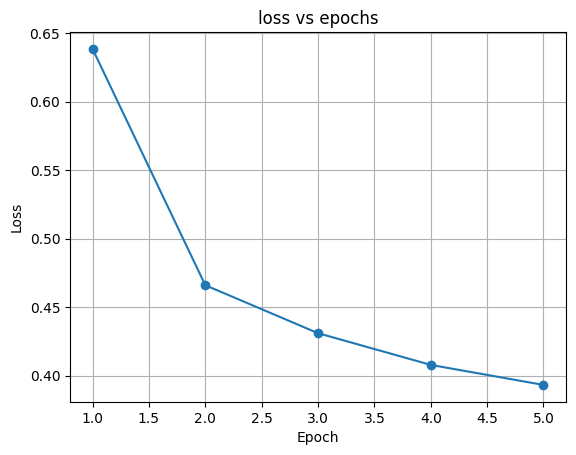

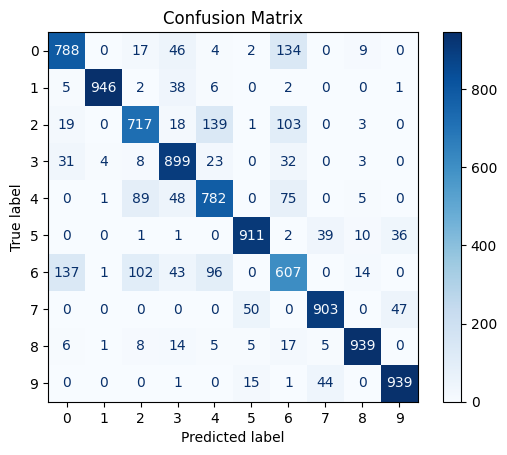

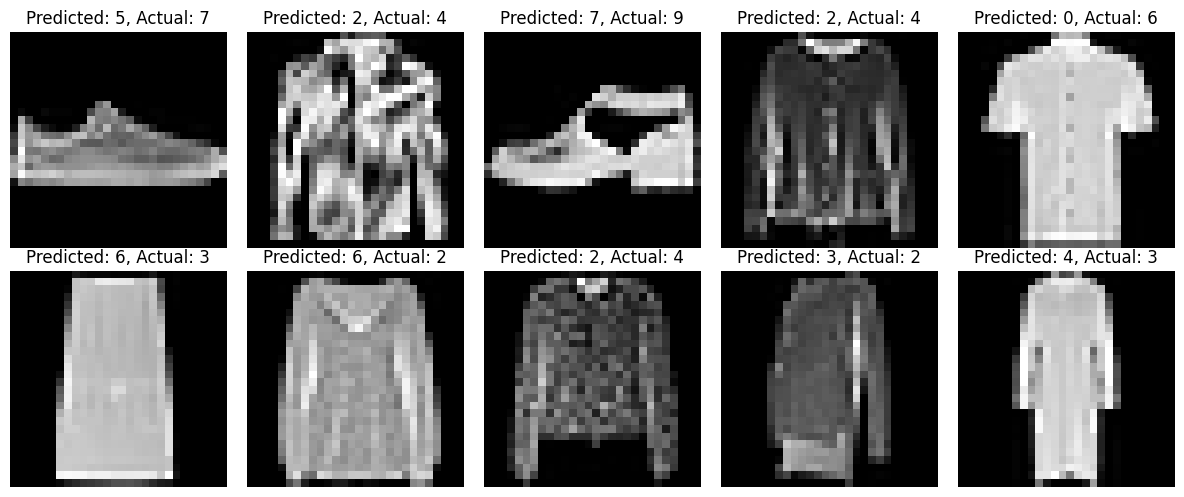

In [2]:
#TASK 5
#by adding dropouts (30% dropout)
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
train_batch = datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)
test_batch = datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_batch,batch_size=64,shuffle=True)
test_loader = DataLoader(test_batch,batch_size=64,shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Image batch shape:{images.shape}")
print(f"Label batch shape:{labels.shape}")

#TASK 2
class MyNeuralNet(nn.Module):
  def __init__(self):
    super(MyNeuralNet,self).__init__()
    self.fc1 = nn.Linear(784,128) #input to first hidden layer.
    self.dropout1 = nn.Dropout(0.3) #30% dropout
    self.fc2 = nn.Linear(128,64) #first to second hidden layer.
    self.dropout2 = nn.Dropout(0.3)
    self.fc3 = nn.Linear(64,10) #second to output layer.
  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=F.relu(self.fc1(x))
    x=self.dropout1(x)
    x=F.relu(self.fc2(x))
    x=self.dropout2(x)
    x=self.fc3(x)
    return x
model = MyNeuralNet()
print(model)
criterion = nn.CrossEntropyLoss()

#TASK 3
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

def accuracy(loader): #accuracy func
  correct=0
  total=0
  with torch.no_grad():
    for images,labels in loader:
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  return 100 * correct/total
#Training loop
loss_values = []
epochs=5
for epoch in range(epochs):
  moving_loss=0.0
  for images,labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    moving_loss+=loss.item()
  avg_loss = moving_loss/len(train_loader)
  loss_values.append(avg_loss)
  train_acc = accuracy(train_loader)
  test_acc = accuracy(test_loader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}, Train_acc = {train_acc:.2f}% , Test_acc = {test_acc:.2f}%")

plt.plot(range(1,epochs+1),loss_values, marker='o')
plt.title("loss vs epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = []
true_labels = []
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predictions.extend(predicted.numpy())
    true_labels.extend(labels.numpy())
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#10 misclassified images
wrong_images = []
wrong_preds = []
actual_lables = []
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(predicted)):
      if predicted[i] != labels[i]:
        wrong_images.append(images[i])
        wrong_preds.append(predicted[i].item())
        actual_lables.append(labels[i].item())
      if len(wrong_images) == 10:
        break
    if len(wrong_images)==10:
      break

#plotting the 10 misclassifed images
plt.figure(figsize =(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(wrong_images[i].squeeze(),cmap='gray')
  plt.title(f"Predicted: {wrong_preds[i]}, Actual: {actual_lables[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()
# By adding dropout, the error has increased and the accuracy has decreased but the difference between the training and testing accuracy decreased so it has helped with the stability.
#This happens because 30% dropout deactivates 30 percent of the neurons making it more robust to new data and helps it to generalize instead of memorizing.

Image batch shape:torch.Size([64, 1, 28, 28])
Label batch shape:torch.Size([64])
MyNeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1/5, Loss: 0.5820313011214677, Train_acc = 85.36% , Test_acc = 84.13%
Epoch 2/5, Loss: 0.3926267536130668, Train_acc = 87.32% , Test_acc = 85.38%
Epoch 3/5, Loss: 0.3548300410829373, Train_acc = 87.25% , Test_acc = 85.53%
Epoch 4/5, Loss: 0.32975338899822376, Train_acc = 88.54% , Test_acc = 86.54%
Epoch 5/5, Loss: 0.31027065431163003, Train_acc = 89.44% , Test_acc = 87.23%


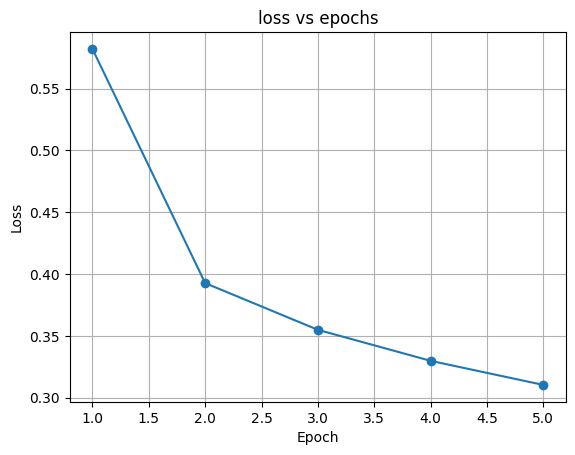

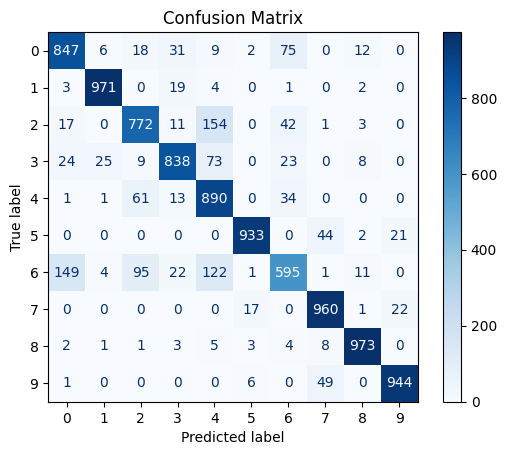

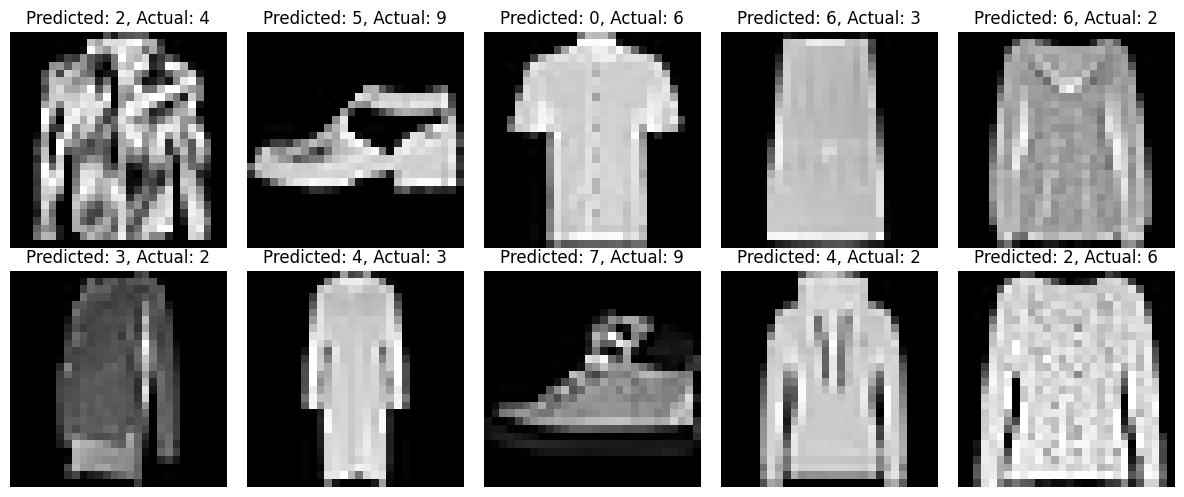

In [3]:
#TASK 5
#Using a different optimizer like SGD
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
train_batch = datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)
test_batch = datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_batch,batch_size=64,shuffle=True)
test_loader = DataLoader(test_batch,batch_size=64,shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Image batch shape:{images.shape}")
print(f"Label batch shape:{labels.shape}")

#TASK 2
class MyNeuralNet(nn.Module):
  def __init__(self):
    super(MyNeuralNet,self).__init__()
    self.fc1 = nn.Linear(784,128) #input to first hidden layer.
    self.fc2 = nn.Linear(128,64) #first to second hidden layer.
    self.fc3 = nn.Linear(64,10) #second to output layer.
  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
model = MyNeuralNet()
print(model)
criterion = nn.CrossEntropyLoss()

#TASK 3
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def accuracy(loader): #accuracy func
  correct=0
  total=0
  with torch.no_grad():
    for images,labels in loader:
      outputs = model(images)
      _,predicted = torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  return 100 * correct/total
#Training loop
loss_values = []
epochs=5
for epoch in range(epochs):
  moving_loss=0.0
  for images,labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    moving_loss+=loss.item()
  avg_loss = moving_loss/len(train_loader)
  loss_values.append(avg_loss)
  train_acc = accuracy(train_loader)
  test_acc = accuracy(test_loader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}, Train_acc = {train_acc:.2f}% , Test_acc = {test_acc:.2f}%")

plt.plot(range(1,epochs+1),loss_values, marker='o')
plt.title("loss vs epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = []
true_labels = []
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predictions.extend(predicted.numpy())
    true_labels.extend(labels.numpy())
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#10 misclassified images
wrong_images = []
wrong_preds = []
actual_lables = []
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(predicted)):
      if predicted[i] != labels[i]:
        wrong_images.append(images[i])
        wrong_preds.append(predicted[i].item())
        actual_lables.append(labels[i].item())
      if len(wrong_images) == 10:
        break
    if len(wrong_images)==10:
      break

#plotting the 10 misclassifed images
plt.figure(figsize =(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(wrong_images[i].squeeze(),cmap='gray')
  plt.title(f"Predicted: {wrong_preds[i]}, Actual: {actual_lables[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()
#This model has trained more slowly and the final test accuracy was lower than with Adam.
#The loss decreased gradually.
#This model performed almost like that with Adam's.